In [1]:
import pandas as pd

# Load the dataset from the uploaded CSV file
file_path = "customer_segmentation_data.csv"
data = pd.read_csv(file_path)

# Display the first few rows and summary info to understand the structure of the dataset
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45217 entries, 0 to 45216
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Customer ID                         45217 non-null  int64  
 1   Age                                 45217 non-null  int64  
 2   Gender                              45217 non-null  object 
 3   Marital Status                      45217 non-null  object 
 4   Education Level                     45217 non-null  object 
 5   Geographic Information              45217 non-null  object 
 6   Occupation                          45216 non-null  object 
 7   Income Level                        45216 non-null  float64
 8   Behavioral Data                     45216 non-null  object 
 9   Purchase History                    45216 non-null  object 
 10  Interactions with Customer Service  45216 non-null  object 
 11  Insurance Products Owned            45216

In [36]:
data.duplicated().sum()

0

In [13]:

from sklearn.preprocessing import LabelEncoder

# Separate categorical and numerical columns
categorical_columns = data.select_dtypes(include=["object"]).columns
numerical_columns = data.select_dtypes(include=["number"]).columns

# Label encode categorical columns for simplicity
label_encoder = LabelEncoder()

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Display encoded data
data.head()


,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,...,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group,Age Group
0,84966,23,0,1,0,23,3,70541.0,4,268,...,1,366603.0,2749.0,2,0,1,0,0,4,18-30
1,95568,26,1,4,2,10,5,54168.0,4,940,...,0,780236.0,1966.0,2,2,1,3,1,4,18-30
2,10544,29,0,3,0,28,3,73899.0,4,385,...,2,773926.0,4413.0,2,0,2,2,2,2,18-30
3,77033,20,1,0,1,29,3,63381.0,4,580,...,1,787815.0,4342.0,1,4,1,1,1,2,18-30
4,88160,25,0,2,1,35,5,38794.0,0,628,...,3,366506.0,1276.0,1,0,4,4,0,1,18-30


In [23]:
# Encode 'Age Group' into numerical labels
age_group_mapping = {"18-30": 1, "31-40": 2, "41-50": 3, "51-60": 4, "61+": 5}
data['Age Group'] = data['Age Group'].map(age_group_mapping)


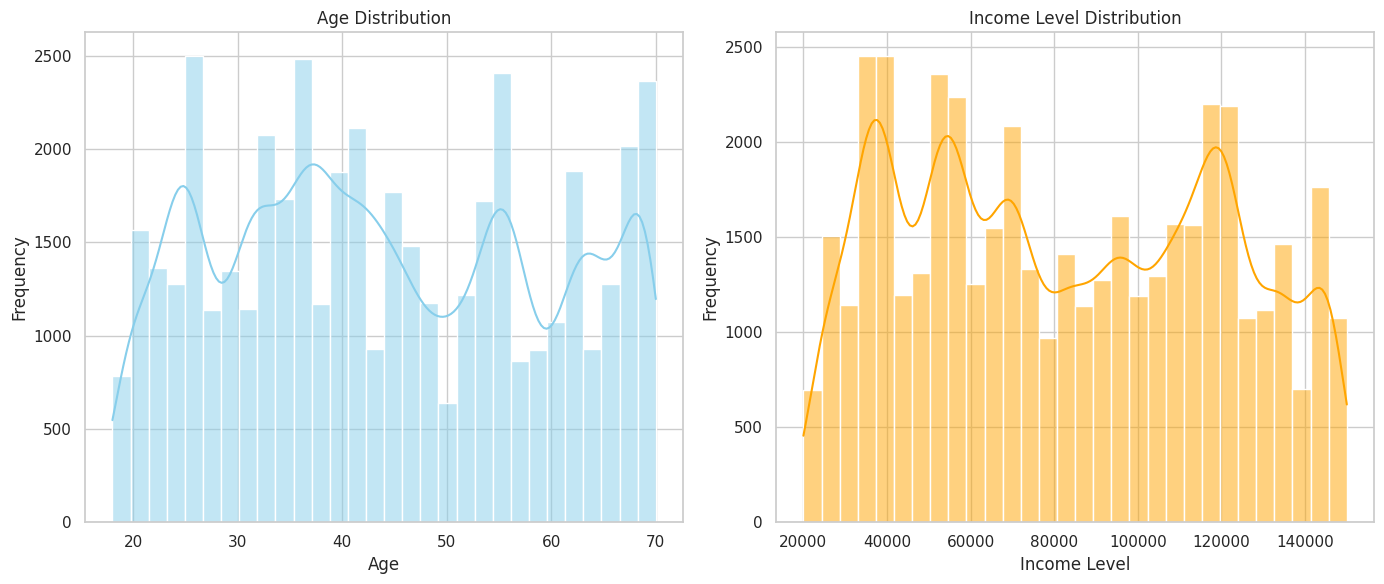

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")

# Plot distributions for numerical columns: Age and Income Level
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Age distribution
sns.histplot(data['Age'], bins=30, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Age Distribution")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequency")

# Income Level distribution
sns.histplot(data['Income Level'], bins=30, kde=True, ax=axes[1], color="orange")
axes[1].set_title("Income Level Distribution")
axes[1].set_xlabel("Income Level")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


The distributions of the numerical columns reveal the following:

1. **Age Distribution:**

The data is slightly right-skewed, with most customers falling within a younger demographic range.
2. **Income Level Distribution:**

The income distribution appears to have a peak near the median and shows some variation, with outliers at higher income levels.

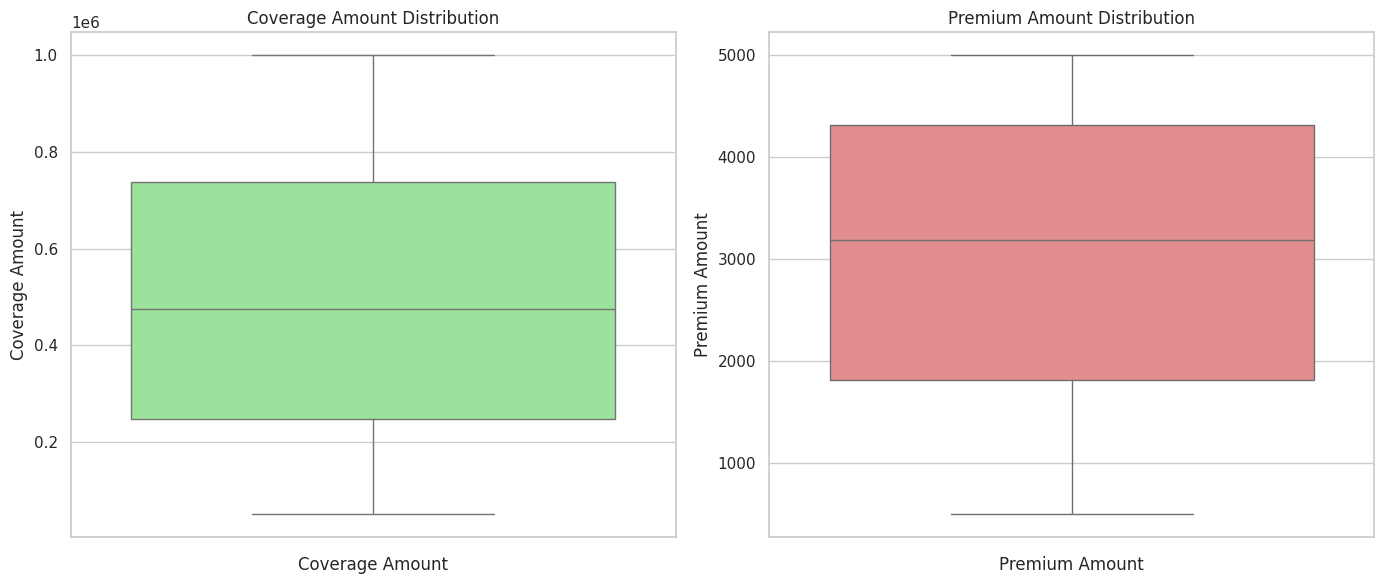

In [25]:
# Plot distributions for Coverage Amount and Premium Amount
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Coverage Amount distribution
sns.boxplot(data['Coverage Amount'], ax=axes[0], color="lightgreen")
axes[0].set_title("Coverage Amount Distribution")
axes[0].set_xlabel("Coverage Amount")

# Premium Amount distribution
sns.boxplot(data['Premium Amount'], ax=axes[1], color="lightcoral")
axes[1].set_title("Premium Amount Distribution")
axes[1].set_xlabel("Premium Amount")

plt.tight_layout()
plt.show()


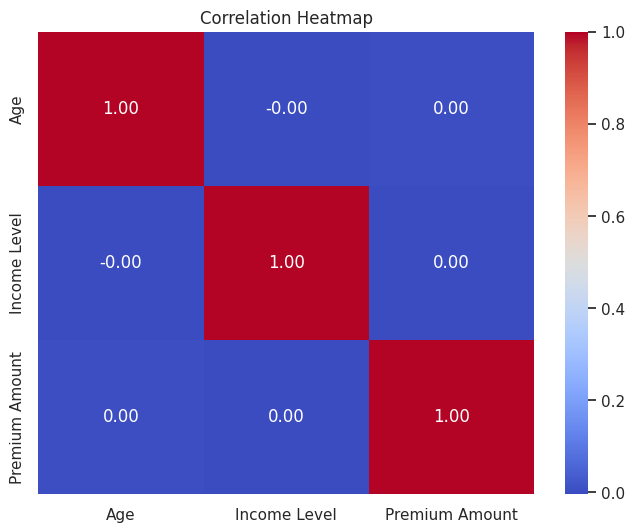

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant numerical columns for correlation analysis
numerical_columns = ['Age', 'Income Level', 'Premium Amount']

# Compute the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


<ipython-input-27-e9ca146efa75>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Gender', y='Premium Amount', ci=None, palette="pastel")
<ipython-input-27-e9ca146efa75>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Gender', y='Premium Amount', ci=None, palette="pastel")


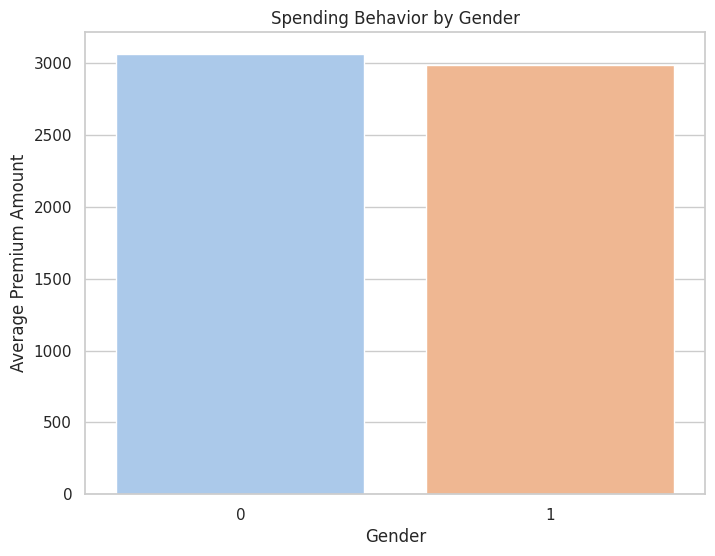

<ipython-input-27-e9ca146efa75>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='Gender', y='Premium Amount', palette="muted")


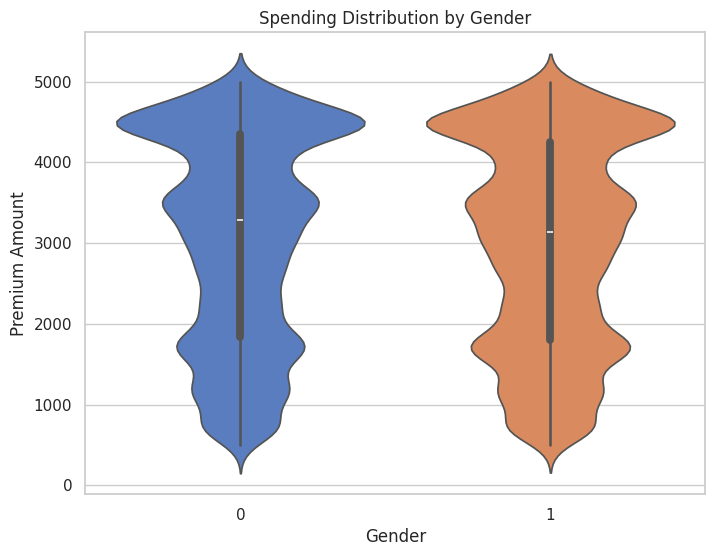

In [27]:
# Bar chart for gender vs. spending
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Gender', y='Premium Amount', ci=None, palette="pastel")
plt.title("Spending Behavior by Gender")
plt.ylabel("Average Premium Amount")
plt.xlabel("Gender")
plt.show()

# Violin plot for gender vs. spending
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x='Gender', y='Premium Amount', palette="muted")
plt.title("Spending Distribution by Gender")
plt.ylabel("Premium Amount")
plt.xlabel("Gender")
plt.show()


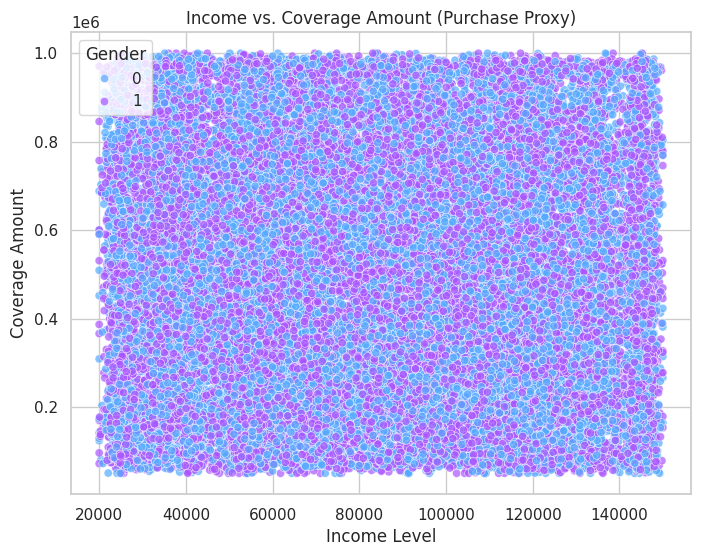

In [28]:
# Scatter plot for income vs. purchase frequency (approximated with 'Coverage Amount')
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Income Level', y='Coverage Amount', hue='Gender', alpha=0.7, palette="cool")
plt.title("Income vs. Coverage Amount (Purchase Proxy)")
plt.xlabel("Income Level")
plt.ylabel("Coverage Amount")
plt.legend(title="Gender")
plt.show()


<ipython-input-29-6b17aee5a3b1>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Marital Status', y='Premium Amount', ci=None, palette="Blues")
<ipython-input-29-6b17aee5a3b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Marital Status', y='Premium Amount', ci=None, palette="Blues")


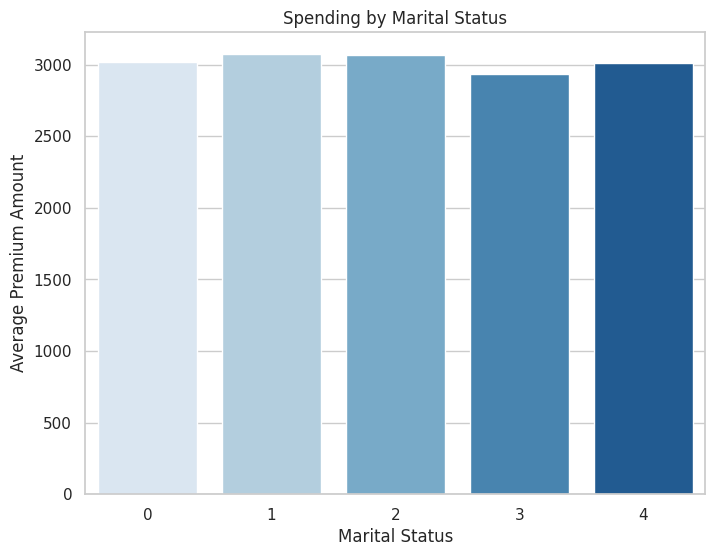

<ipython-input-29-6b17aee5a3b1>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Age Group', y='Premium Amount', ci=None, palette="Oranges")
<ipython-input-29-6b17aee5a3b1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Age Group', y='Premium Amount', ci=None, palette="Oranges")


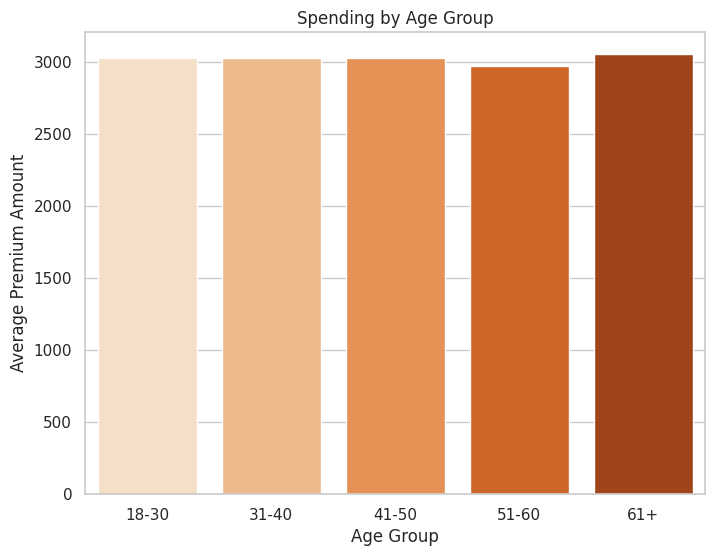

In [29]:
# Group by marital status and visualize spending
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Marital Status', y='Premium Amount', ci=None, palette="Blues")
plt.title("Spending by Marital Status")
plt.ylabel("Average Premium Amount")
plt.xlabel("Marital Status")
plt.show()

# Group by age ranges and visualize spending
data['Age Group'] = pd.cut(data['Age'], bins=[18, 30, 40, 50, 60, 80],
                                   labels=["18-30", "31-40", "41-50", "51-60", "61+"])

plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Age Group', y='Premium Amount', ci=None, palette="Oranges")
plt.title("Spending by Age Group")
plt.ylabel("Average Premium Amount")
plt.xlabel("Age Group")
plt.show()


<ipython-input-30-1d6b3c66792c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_occupations.values, y=top_occupations.index, palette="Greens")


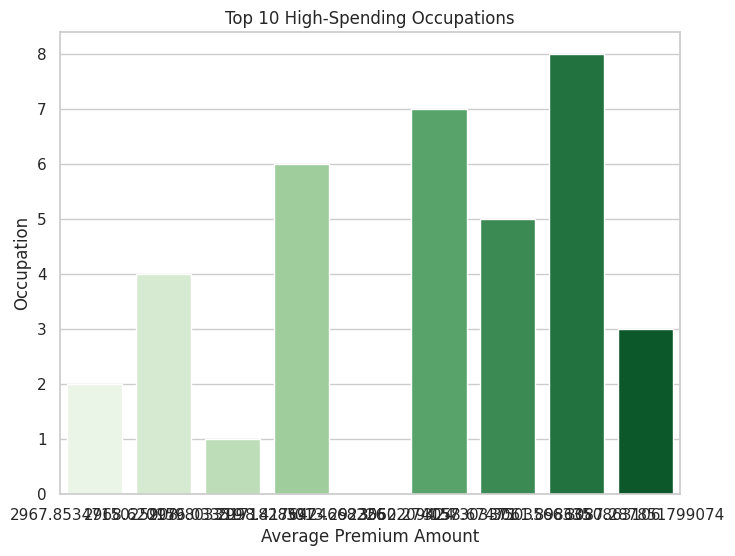

In [30]:
# Identify high-spending categories (e.g., occupation)
plt.figure(figsize=(8, 6))
top_occupations = data.groupby('Occupation')['Premium Amount'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_occupations.values, y=top_occupations.index, palette="Greens")
plt.title("Top 10 High-Spending Occupations")
plt.xlabel("Average Premium Amount")
plt.ylabel("Occupation")
plt.show()


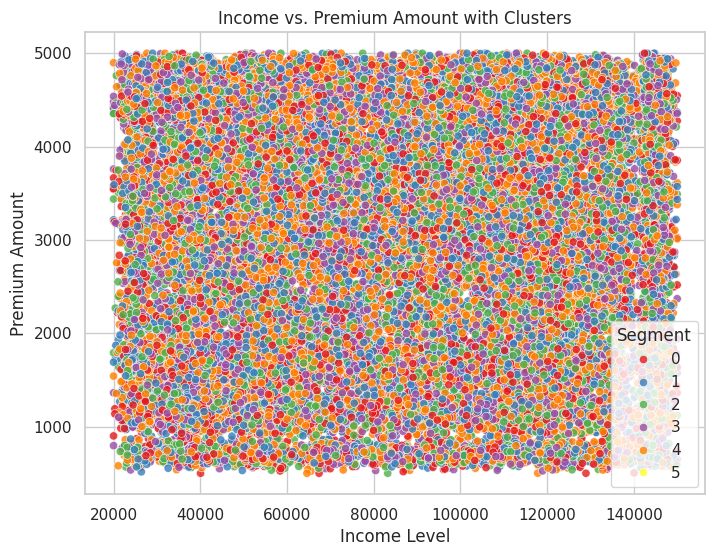

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Income Level', y='Premium Amount', hue='Segmentation Group', alpha=0.8, palette="Set1")
plt.title("Income vs. Premium Amount with Clusters")
plt.xlabel("Income Level")
plt.ylabel("Premium Amount")
plt.legend(title="Segment")
plt.show()


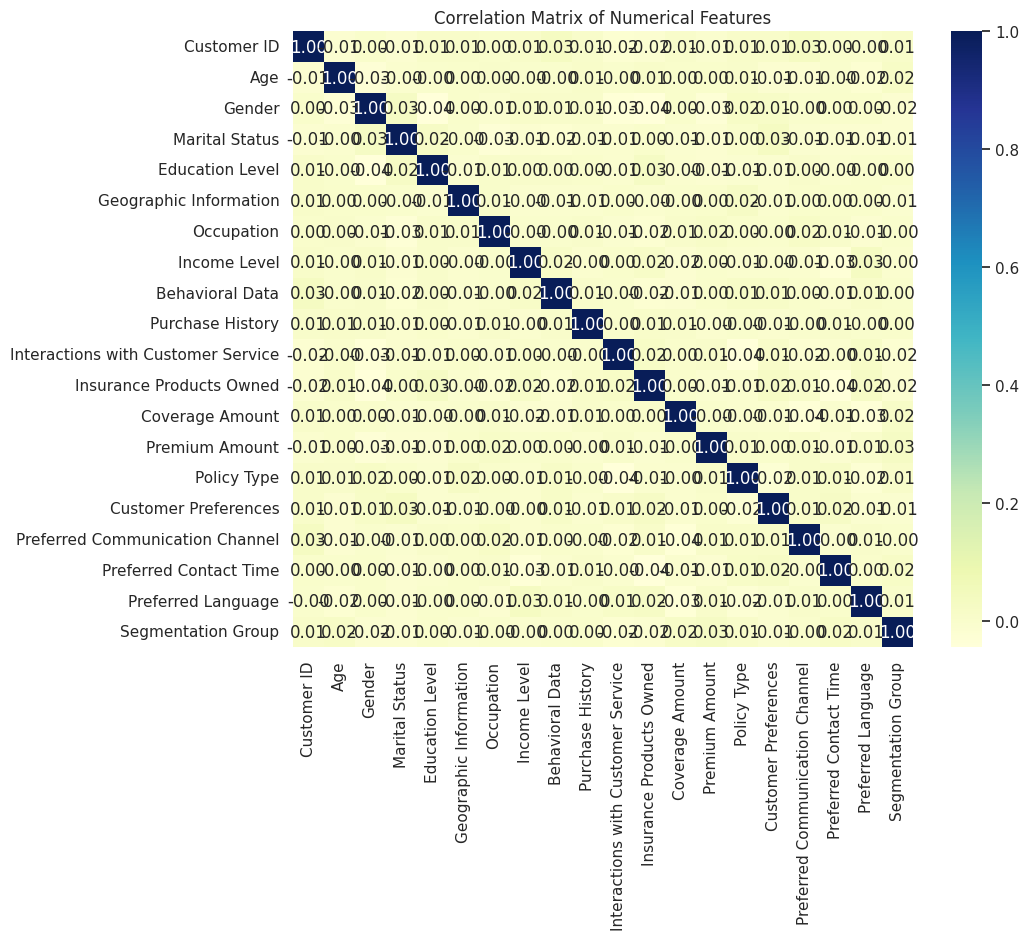

In [34]:
# Select only numerical columns for the correlation matrix
numerical_data = data.select_dtypes(include=["number"])

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Correlation Matrix of Numerical Features")
plt.show()



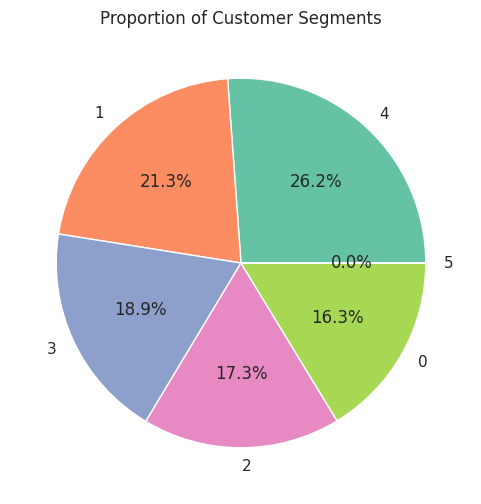

In [35]:
plt.figure(figsize=(6, 6))
data['Segmentation Group'].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("Set2"))
plt.title("Proportion of Customer Segments")
plt.ylabel("")  # Remove default y-axis label
plt.show()
